This code compares the behavior of animal groups before, during and after drone exchanges. We have scored each group's behavioral state during the two minutes prior to the drone exchange (the two minutes preceding the launch of the replacement drone), during the drone exchange (the time during which two drones are in flight), and the two minutes after the drone exchange (the two minutes after the replaced drone lands).

In [1]:
# import packages
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import numpy as np

In [2]:
# load data
df = pd.read_csv('data/exchanges_clean.csv')
df['group_behavior'] = df['group_behavior'].astype('object')

# reshape data
df2 = df.drop(['observation','start_flight', 'start_timestamp', 'end_flight', 'end_timestamp'], axis = 1)
df_new = df2.pivot(index = ['exchange_num','species'], columns = 'clip_type', values='group_behavior')
df_new.reset_index(inplace=True)  
df_new.index.rename('index', inplace = True)
df_new

clip_type,exchange_num,species,exchange,post,pre
index,,,,,
0,ob025-1,pz,0,0,0
1,ob029-1,imp,1,1,1
2,ob031-1,imp,1,1,0
3,ob033-1,pz,0,0,2
4,ob039-1,imp,0,0,0
...,...,...,...,...,...
63,ob114-1,pz,0,0,0
64,ob114-2,gz,0,0,0
65,ob114-2,imp,0,0,0


In [3]:
# Pratt zero method is more robust for ordinal data. Do two-tailed tests.

# Compare behavior before exchange to behavior during exchange
r1 = wilcoxon(df_new['pre'], df_new['exchange'], zero_method = 'pratt')
# Compare behavior during exchange to behavior after exchange
r2 = wilcoxon(df_new['exchange'], df_new['post'], zero_method = 'pratt')
# Compare behavior before exchange to after exchange
r3 = wilcoxon(df_new['pre'], df_new['post'], zero_method = 'pratt')

# print results in table
pd.DataFrame(np.array([r1, r2, r3]), columns = ['W-statistic', 'p-value'], 
             index = ['before vs during', 'during vs after', 'before vs after'])

,W-statistic,p-value
before vs during,383.0,0.858171
during vs after,156.5,0.017482
before vs after,340.0,0.062287


In [18]:
#If the test statistic W is reported, the rank correlation r is equal to the test statistic W divided by the 
# total rank sum S, or r = W/S. [8] Using the above example, the test statistic is W = 9. The sample size of 9 
# has a total rank sum of S = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9) = 45. Hence, the rank correlation is 9/45, so 
# r = 0.20. 

13.421955403087479

In [21]:
156.6/(np.sqrt(68))

18.99053944034487

In [13]:
# One-tailed test for during vs after

# Compare behavior during exchange to behavior after exchange
r2_1 = wilcoxon(df_new['exchange'], df_new['post'], zero_method = 'pratt', alternative = 'less')

r2_1

WilcoxonResult(statistic=156.5, pvalue=0.008740837204306321)

In [4]:
# # Create a version of the behavior scores in which each score has a small value added to it. This will allow the
# # data points to be jittered in a swarm plot so that all points can be displayed.
# df['jittered_scores'] = (np.random.randint(-250,250,len(df))/1000) + df['group_behavior']

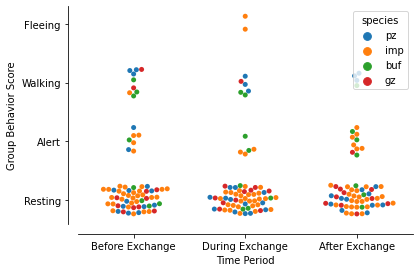

In [7]:
# #ax = sns.violinplot(x = 'clip_type', y = 'group_behavior', data = df, order = ['pre', 'exchange', 'post'])
# #ax = sns.swarmplot(x = 'clip_type', y = 'jittered_scores', data = df, order = ['pre', 'exchange', 'post'], color = '0.2')
# ax = sns.swarmplot(x = 'clip_type', y = 'jittered_scores', hue = 'species', data = df, order = ['pre', 'exchange', 'post'])
# ax.set(xlabel='Time Period', ylabel='Group Behavior Score', yticks = [0,1,2,3], xticklabels = ['Before Exchange', 'During Exchange', 'After Exchange'],
#       yticklabels = ['Resting', 'Alert', 'Walking', "Fleeing"])
# sns.despine(offset = 10)

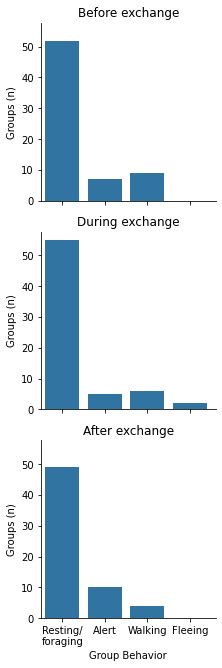

In [4]:
g = sns.FacetGrid(df, row = 'clip_type', row_order = ['pre', 'exchange', 'post'])
g.map_dataframe(sns.countplot, x="group_behavior")
g.set(xticks = [0,1,2,3], xlim=[-0.5,3.6])
g.set_axis_labels("Group Behavior", "Groups (n)")
g.set_xticklabels(['Resting/\nforaging', 'Alert', 'Walking', 'Fleeing'])
for ax, title in zip(g.axes.flat, ['Before exchange', 'During exchange', 'After exchange']):
    ax.set_title(title)

/Users/blaircostelloe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

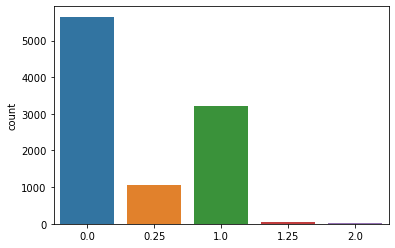

In [5]:
# compare variance between the three groups by bootstrapping and calculating Interquartile range of each distribution
from scipy.stats import iqr
# before exchange
before_IQR = []
for i in range(10000):
    sample_n = np.random.choice(df_new.pre, size = 68)
    before_IQR.append(iqr(sample_n))

sns.countplot(before_IQR)
# #sns.countplot(pre_vs_during)

# sample_mean = [] # use mean here or median?
# for i in range(10000):
#     sample_n = np.random.choice(pre_vs_during, size = 20)
#     sample_mean.append(np.mean(sample_n))

# sns.countplot(sample_mean)

/Users/blaircostelloe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

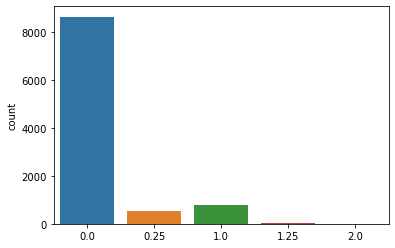

In [6]:
exchange_IQR = []
for i in range(10000):
    sample_n = np.random.choice(df_new.exchange, size = 68)
    exchange_IQR.append(iqr(sample_n))

sns.countplot(exchange_IQR)

/Users/blaircostelloe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

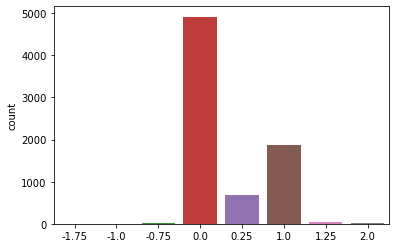

In [7]:
post_IQR = []
for i in range(10000):
    sample_n = np.random.choice(df_new.post, size = 68)
    post_IQR.append(iqr(sample_n))

sns.countplot(post_IQR)

In [ ]:
# To compare the behavior of groups before, during and after the exchange, I should take the
# difference between each pair of groups, run bootstrap on the distribution, and see if 0 falls in the 95 
# confidence interval.
# bootstrapping tutorial: https://datasciencechalktalk.com/2019/11/12/bootstrap-sampling-an-implementation-with-python/

/Users/blaircostelloe/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

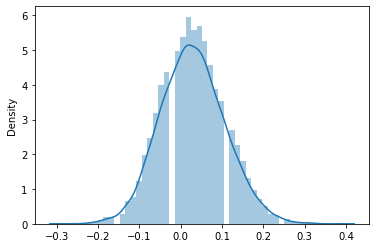

In [8]:
# To compare before versus during exchange:
pre_vs_during = df_new.pre - df_new.exchange

#sns.countplot(pre_vs_during)

sample_mean = [] # use mean here or median?
for i in range(10000):
    sample_n = np.random.choice(pre_vs_during, size = 68)
    sample_mean.append(np.mean(sample_n))

sns.distplot(sample_mean)

# sample_mean = []
# for _ in range(10000):  #so B=10000
#     sample_n = np.random.choice(sample, size=300)
#     sample_mean.append(sample_n.mean())

/Users/blaircostelloe/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

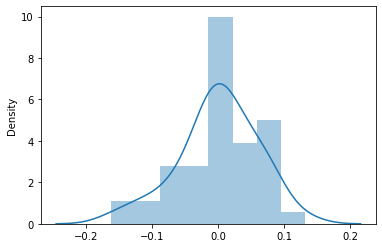

In [9]:
# To compare during versus after exchange:
during_vs_post = df_new.exchange - df_new.post

#sns.countplot(pre_vs_during)

sample_mean = [] # use mean here or median?
for i in range(10000):
    sample_n = np.random.choice(during_vs_post, size = 68)
    sample_mean.append(np.mean(sample_n))

sns.distplot(sample_mean)

/Users/blaircostelloe/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

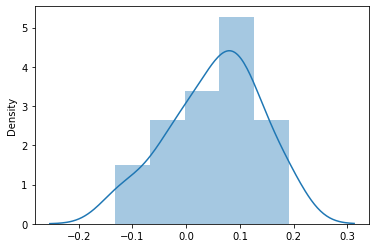

In [10]:
# To compare during versus after exchange:
pre_vs_post = df_new.pre - df_new.post

#sns.countplot(pre_vs_during)

sample_mean = [] # use mean here or median?
for i in range(10000):
    sample_n = np.random.choice(pre_vs_post, size = 68)
    sample_mean.append(np.mean(sample_n))

sns.distplot(sample_mean)